In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('movies_metadata.csv', dtype='unicode')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null object
runtime                  45203 non-null object
spoken_languages         45460 non-null object
status                   45379 non-null object


In [3]:
sum(df.duplicated())

17

Подготовка дата фрейма

In [4]:
columns_ = list(df.columns.values)
ex_columns = ['budget', 'revenue', 'status', 'title', 'release_date', 'vote_average', 'vote_count']
dr_columns_ = [i for i in columns_ if not(i in ex_columns)]
df = df.drop(dr_columns_, axis=1)
df.drop_duplicates(inplace = True)
df.head()

,budget,release_date,revenue,status,title,vote_average,vote_count
0,30000000,1995-10-30,373554033,Released,Toy Story,7.7,5415
1,65000000,1995-12-15,262797249,Released,Jumanji,6.9,2413
2,0,1995-12-22,0,Released,Grumpier Old Men,6.5,92
3,16000000,1995-12-22,81452156,Released,Waiting to Exhale,6.1,34
4,0,1995-02-10,76578911,Released,Father of the Bride Part II,5.7,173


Форматирование даты выхода и удаление фильмов с годом выхода до 1800 и с нулевым бюджетом

In [5]:
df['release_date'].replace('', np.nan, inplace=True)
df['budget'].replace(0, np.nan, inplace=True)
df.dropna(subset=['budget', 'release_date'], inplace=True)
df['release_date'] = df['release_date'].str.split('-').str[0]
df['release_date'] = df['release_date'].astype(int)
df.drop(df[df.release_date < 1800].index, inplace=True)

Убираем все фильмы которые не имеют статус релиза

In [6]:
df.drop(df[df.status != 'Released'].index, inplace=True)

In [7]:
df['release_date'].values.min(), df['release_date'].values.max()

(1874, 2017)

In [8]:
df['total_ball'] = (df['vote_average']).astype(float)*(df['vote_count']).astype(float)
df['investment_ratio'] = (df['revenue']).astype(float)/(df['budget']).astype(float)*100
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)
df['vote_count'] = df['vote_count'].astype(float)
df['vote_average'] = df['vote_average'].astype(float)
df.drop(df[df.revenue < 10000].index, inplace=True)
df.drop(df[df.budget < 10000].index, inplace=True)
#df.drop(df[df.total_ball > 12000].index, inplace=True)

In [9]:
df.head()

,budget,release_date,revenue,status,title,vote_average,vote_count,total_ball,investment_ratio
0,30000000.0,1995,373554033.0,Released,Toy Story,7.7,5415.0,41695.5,1245.180110
1,65000000.0,1995,262797249.0,Released,Jumanji,6.9,2413.0,16649.7,404.303460
3,16000000.0,1995,81452156.0,Released,Waiting to Exhale,6.1,34.0,207.4,509.075975
5,60000000.0,1995,187436818.0,Released,Heat,7.7,1886.0,14522.2,312.394697
8,35000000.0,1995,64350171.0,Released,Sudden Death,5.5,174.0,957.0,183.857631


График популярности от бюджета

In [10]:
investment_ratio_year = (df[['release_date', 'investment_ratio']].groupby('release_date').mean())
total_ball_year = (df[['release_date', 'total_ball']].groupby('release_date').mean())
budget_year = (df[['release_date', 'budget']].groupby('release_date').mean())
revenue_year = (df[['release_date', 'revenue']].groupby('release_date').mean())

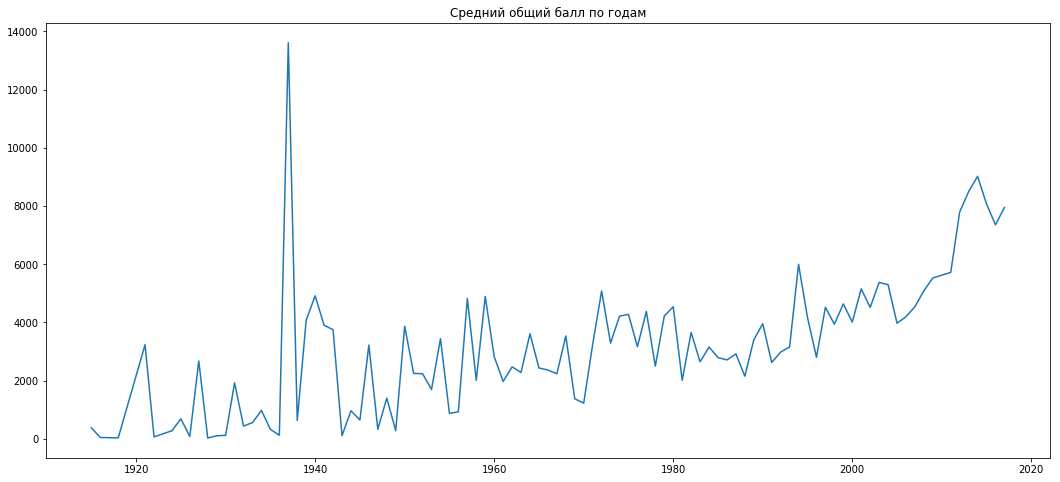

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(total_ball_year)
plt.title(('Средний общий балл по годам'))
plt.show()

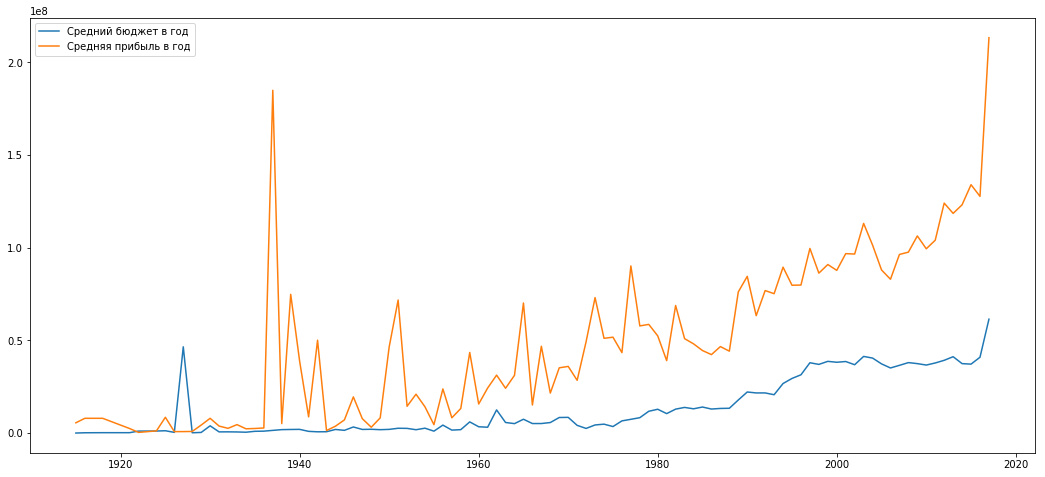

In [12]:
plt.figure(figsize=(18, 8))

plt.plot(budget_year)
plt.plot(revenue_year)
plt.legend(('Средний бюджет в год', 'Средняя прибыль в год'))
plt.show()

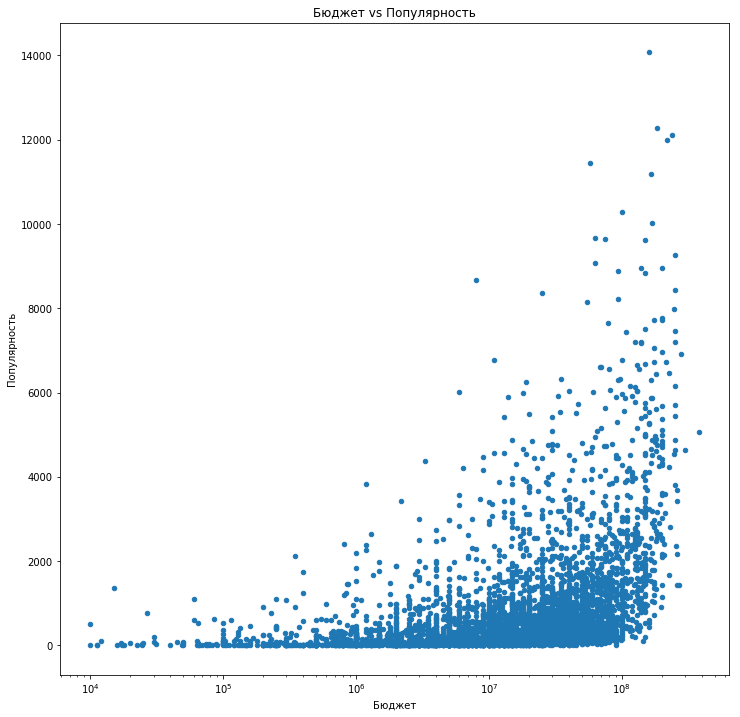

In [13]:
df.plot(x='budget', y='vote_count', kind='scatter', figsize=(12, 12))
plt.xscale('log')
plt.title('Бюджет vs Популярность')
plt.xlabel('Бюджет')
plt.ylabel('Популярность')
plt.show()

In [14]:
corr_coef = np.corrcoef(df['budget'], df['vote_count'])[0][1]
corr_coef

0.5838364602068751

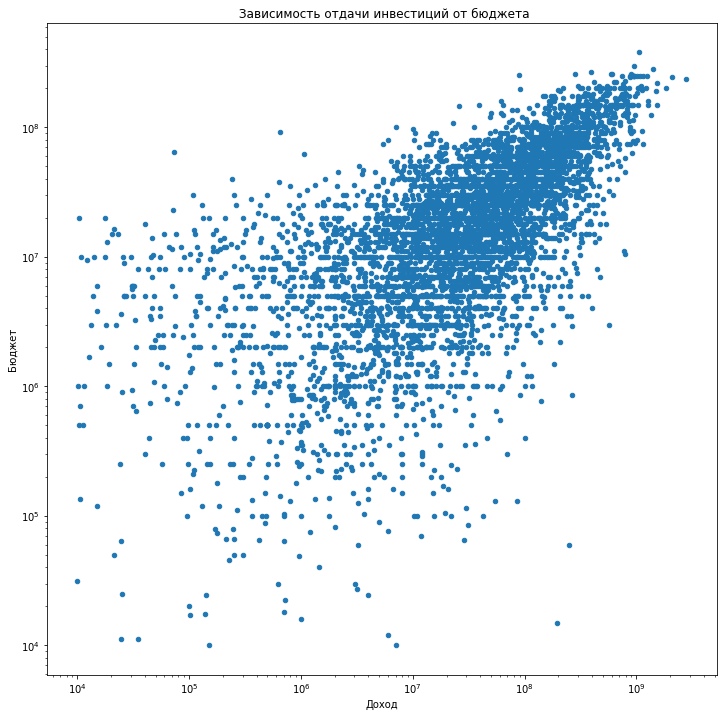

In [15]:
df.plot(x='revenue', y='budget', kind='scatter', figsize=(12, 12))
plt.yscale('log')
plt.xscale('log')
plt.title(' Зависимость отдачи инвестиций от бюджета')
plt.xlabel('Доход')
plt.ylabel('Бюджет')
plt.show()

In [16]:
corr_coef = np.corrcoef(df['revenue'], df['budget'])[0][1]
corr_coef

0.7286455401408369

На основании графиков можно сделать вывод: Из диаграммы и значения 0,7286 для коэффициента Пирсона можно сделать вывод, что существует положительная связь между бюджетами фильмов и их доходами, также есть взаимосвязь между бюджетом и популярностью фильма 0.5838, однако коэффициент корреляции недостаточно высок.